In [35]:
import fastf1 as f1
import pandas as pd
import math
import matplotlib.pyplot as plt
from timple.timedelta import strftimedelta

import fastf1.plotting
from fastf1.core import Laps

In [25]:
f1.Cache.enable_cache('cache')
f1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None, misc_mpl_mods=False)

In [11]:
session = f1.get_session(2024, 2, 'Q')

In [12]:
session.name

'Qualifying'

In [13]:
session.date

Timestamp('2024-03-08 17:00:00')

In [14]:
session.event

RoundNumber                                                    2
Country                                             Saudi Arabia
Location                                                  Jeddah
OfficialEventName    FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2024
EventDate                                    2024-03-09 00:00:00
EventName                               Saudi Arabian Grand Prix
EventFormat                                         conventional
Session1                                              Practice 1
Session1Date                           2024-03-07 16:30:00+03:00
Session1DateUtc                              2024-03-07 13:30:00
Session2                                              Practice 2
Session2Date                           2024-03-07 20:00:00+03:00
Session2DateUtc                              2024-03-07 17:00:00
Session3                                              Practice 3
Session3Date                           2024-03-08 16:30:00+03:00
Session3DateUtc          

In [15]:
schedule = f1.get_event_schedule(2024)

In [16]:
schedule

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session1DateUtc,...,Session3,Session3Date,Session3DateUtc,Session4,Session4Date,Session4DateUtc,Session5,Session5Date,Session5DateUtc,F1ApiSupport
0,0,Bahrain,Sakhir,FORMULA 1 ARAMCO PRE-SEASON TESTING 2024,2024-02-23,Pre-Season Testing,testing,Practice 1,2024-02-21 10:00:00+03:00,2024-02-21 07:00:00,...,Practice 3,2024-02-23 10:00:00+03:00,2024-02-23 07:00:00,None,NaT,NaT,None,NaT,NaT,True
1,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2024,2024-03-02,Bahrain Grand Prix,conventional,Practice 1,2024-02-29 14:30:00+03:00,2024-02-29 11:30:00,...,Practice 3,2024-03-01 15:30:00+03:00,2024-03-01 12:30:00,Qualifying,2024-03-01 19:00:00+03:00,2024-03-01 16:00:00,Race,2024-03-02 18:00:00+03:00,2024-03-02 15:00:00,True
2,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2024,2024-03-09,Saudi Arabian Grand Prix,conventional,Practice 1,2024-03-07 16:30:00+03:00,2024-03-07 13:30:00,...,Practice 3,2024-03-08 16:30:00+03:00,2024-03-08 13:30:00,Qualifying,2024-03-08 20:00:00+03:00,2024-03-08 17:00:00,Race,2024-03-09 20:00:00+03:00,2024-03-09 17:00:00,True
3,3,Australia,Melbourne,FORMULA 1 ROLEX AUSTRALIAN GRAND PRIX 2024,2024-03-24,Australian Grand Prix,conventional,Practice 1,2024-03-22 12:30:00+11:00,2024-03-22 01:30:00,...,Practice 3,2024-03-23 12:30:00+11:00,2024-03-23 01:30:00,Qualifying,2024-03-23 16:00:00+11:00,2024-03-23 05:00:00,Race,2024-03-24 15:00:00+11:00,2024-03-24 04:00:00,True
4,4,Japan,Suzuka,FORMULA 1 MSC CRUISES JAPANESE GRAND PRIX 2024,2024-04-07,Japanese Grand Prix,conventional,Practice 1,2024-04-05 11:30:00+09:00,2024-04-05 02:30:00,...,Practice 3,2024-04-06 11:30:00+09:00,2024-04-06 02:30:00,Qualifying,2024-04-06 15:00:00+09:00,2024-04-06 06:00:00,Race,2024-04-07 14:00:00+09:00,2024-04-07 05:00:00,True
5,5,China,Shanghai,FORMULA 1 LENOVO CHINESE GRAND PRIX 2024,2024-04-21,Chinese Grand Prix,sprint_shootout,Practice 1,2024-04-19 11:30:00+08:00,2024-04-19 03:30:00,...,Sprint,2024-04-20 11:00:00+08:00,2024-04-20 03:00:00,Qualifying,2024-04-20 15:00:00+08:00,2024-04-20 07:00:00,Race,2024-04-21 15:00:00+08:00,2024-04-21 07:00:00,True
6,6,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2024,2024-05-05,Miami Grand Prix,sprint_shootout,Practice 1,2024-05-03 12:30:00-04:00,2024-05-03 16:30:00,...,Sprint,2024-05-04 12:00:00-04:00,2024-05-04 16:00:00,Qualifying,2024-05-04 16:00:00-04:00,2024-05-04 20:00:00,Race,2024-05-05 16:00:00-04:00,2024-05-05 20:00:00,True
7,7,Italy,Imola,FORMULA 1 MSC CRUISES GRAN PREMIO DEL MADE IN ...,2024-05-19,Emilia Romagna Grand Prix,conventional,Practice 1,2024-05-17 13:30:00+02:00,2024-05-17 11:30:00,...,Practice 3,2024-05-18 12:30:00+02:00,2024-05-18 10:30:00,Qualifying,2024-05-18 16:00:00+02:00,2024-05-18 14:00:00,Race,2024-05-19 15:00:00+02:00,2024-05-19 13:00:00,True
8,8,Monaco,Monaco,FORMULA 1 GRAND PRIX DE MONACO 2024,2024-05-26,Monaco Grand Prix,conventional,Practice 1,2024-05-24 13:30:00+02:00,2024-05-24 11:30:00,...,Practice 3,2024-05-25 12:30:00+02:00,2024-05-25 10:30:00,Qualifying,2024-05-25 16:00:00+02:00,2024-05-25 14:00:00,Race,2024-05-26 15:00:00+02:00,2024-05-26 13:00:00,True
9,9,Canada,Montréal,FORMULA 1 AWS GRAND PRIX DU CANADA 2024,2024-06-09,Canadian Grand Prix,conventional,Practice 1,2024-06-07 13:30:00-04:00,2024-06-07 17:30:00,...,Practice 3,2024-06-08 12:30:00-04:00,2024-06-08 16:30:00,Qualifying,2024-06-08 16:00:00-04:00,2024-06-08 20:00:00,Race,2024-06-09 14:00:00-04:00,2024-06-09 18:00:00,True


In [17]:
session.load()

core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v3.3.1]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req           

In [18]:
session.results

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,,Red Bull Racing,3671c6,,Max,Verstappen,Max Verstappen,...,NED,1.0,,NaN,0 days 00:01:28.171000,0 days 00:01:28.033000,0 days 00:01:27.472000,NaT,,NaN
16,16,C LECLERC,LEC,,Ferrari,e8002d,,Charles,Leclerc,Charles Leclerc,...,MON,2.0,,NaN,0 days 00:01:28.318000,0 days 00:01:28.112000,0 days 00:01:27.791000,NaT,,NaN
11,11,S PEREZ,PER,,Red Bull Racing,3671c6,,Sergio,Perez,Sergio Perez,...,MEX,3.0,,NaN,0 days 00:01:28.638000,0 days 00:01:28.467000,0 days 00:01:27.807000,NaT,,NaN
14,14,F ALONSO,ALO,,Aston Martin,229971,,Fernando,Alonso,Fernando Alonso,...,ESP,4.0,,NaN,0 days 00:01:28.706000,0 days 00:01:28.122000,0 days 00:01:27.846000,NaT,,NaN
81,81,O PIASTRI,PIA,,McLaren,ff8000,,Oscar,Piastri,Oscar Piastri,...,AUS,5.0,,NaN,0 days 00:01:28.755000,0 days 00:01:28.343000,0 days 00:01:28.089000,NaT,,NaN
4,4,L NORRIS,NOR,,McLaren,ff8000,,Lando,Norris,Lando Norris,...,GBR,6.0,,NaN,0 days 00:01:28.805000,0 days 00:01:28.479000,0 days 00:01:28.132000,NaT,,NaN
63,63,G RUSSELL,RUS,,Mercedes,27f4d2,,George,Russell,George Russell,...,GBR,7.0,,NaN,0 days 00:01:28.749000,0 days 00:01:28.448000,0 days 00:01:28.316000,NaT,,NaN
44,44,L HAMILTON,HAM,,Mercedes,27f4d2,,Lewis,Hamilton,Lewis Hamilton,...,GBR,8.0,,NaN,0 days 00:01:28.994000,0 days 00:01:28.606000,0 days 00:01:28.460000,NaT,,NaN
22,22,Y TSUNODA,TSU,,RB,6692ff,,Yuki,Tsunoda,Yuki Tsunoda,...,JPN,9.0,,NaN,0 days 00:01:28.988000,0 days 00:01:28.564000,0 days 00:01:28.547000,NaT,,NaN
18,18,L STROLL,STR,,Aston Martin,229971,,Lance,Stroll,Lance Stroll,...,CAN,10.0,,NaN,0 days 00:01:28.250000,0 days 00:01:28.578000,0 days 00:01:28.572000,NaT,,NaN


In [19]:
session.laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:21:50.987000,VER,1,NaT,1.0,1.0,0 days 00:20:12.226000,NaT,NaT,0 days 00:00:31.105000,...,True,Red Bull Racing,0 days 00:20:12.226000,2024-03-08 17:06:16.988,1,NaN,False,,False,False
1,0 days 00:23:19.478000,VER,1,0 days 00:01:28.491000,2.0,1.0,NaT,NaT,0 days 00:00:32.081000,0 days 00:00:28.013000,...,True,Red Bull Racing,0 days 00:21:50.987000,2024-03-08 17:07:55.749,1,NaN,False,,False,True
2,0 days 00:25:25.315000,VER,1,0 days 00:02:05.837000,3.0,1.0,NaT,0 days 00:25:23.773000,0 days 00:00:43.178000,0 days 00:00:39.436000,...,True,Red Bull Racing,0 days 00:23:19.478000,2024-03-08 17:09:24.240,1,NaN,False,,False,False
3,0 days 00:29:59.456000,VER,1,NaT,4.0,2.0,0 days 00:28:08.503000,NaT,NaT,0 days 00:00:31.857000,...,False,Red Bull Racing,0 days 00:25:25.315000,2024-03-08 17:11:30.077,1,NaN,False,,False,False
4,0 days 00:31:27.627000,VER,1,0 days 00:01:28.171000,5.0,2.0,NaT,NaT,0 days 00:00:31.953000,0 days 00:00:27.991000,...,False,Red Bull Racing,0 days 00:29:59.456000,2024-03-08 17:16:04.218,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,0 days 00:23:10.820000,SAR,2,0 days 00:01:29.540000,5.0,1.0,NaT,NaT,0 days 00:00:32.594000,0 days 00:00:28.393000,...,True,Williams,0 days 00:21:41.280000,2024-03-08 17:07:46.042,1,NaN,False,,False,True
312,0 days 00:25:11.492000,SAR,2,0 days 00:02:00.672000,6.0,1.0,NaT,0 days 00:25:10.424000,0 days 00:00:41.105000,0 days 00:00:36.446000,...,True,Williams,0 days 00:23:10.820000,2024-03-08 17:09:15.582,1,NaN,False,,False,False
313,0 days 00:29:14.374000,SAR,2,NaT,7.0,2.0,0 days 00:27:17.863000,NaT,NaT,0 days 00:00:32.897000,...,True,Williams,0 days 00:25:11.492000,2024-03-08 17:11:16.254,1,NaN,False,,False,False
314,0 days 00:30:43.900000,SAR,2,0 days 00:01:29.526000,8.0,2.0,NaT,NaT,0 days 00:00:32.691000,0 days 00:00:28.383000,...,True,Williams,0 days 00:29:14.374000,2024-03-08 17:15:19.136,1,NaN,False,,False,True


In [27]:
drivers = pd.unique(session.laps['Driver'])

In [28]:
print(drivers)

['VER' 'LEC' 'PER' 'RUS' 'NOR' 'ALO' 'STR' 'PIA' 'HAM' 'BEA' 'MAG' 'GAS'
 'TSU' 'OCO' 'HUL' 'RIC' 'ALB' 'BOT' 'ZHO' 'SAR']


In [56]:
list_fastest_laps = list()
for driver in drivers:
    drivers_fastest_lap = session.laps.pick_driver(driver).pick_fastest()
    list_fastest_laps.append(drivers_fastest_lap)

fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)
fastest_laps = fastest_laps[fastest_laps['Driver'].notna()]

/Users/kleblanc/f1_python/.venv/lib/python3.11/site-packages/fastf1/core.py:3063: FutureWarning: In the future, `None` will be returned instead of an empty `Lap` object when there are no laps that satisfy the definition for fastest lap.
  warnings.warn(("In the future, `None` will be returned instead of "


In [57]:
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

/var/folders/js/6d3vrt5n29d4gz_jpdwrbg8c0000gn/T/ipykernel_31844/1271818528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']


In [58]:
print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

   Driver                LapTime           LapTimeDelta
0     VER 0 days 00:01:27.472000        0 days 00:00:00
1     LEC 0 days 00:01:27.791000 0 days 00:00:00.319000
2     PER 0 days 00:01:27.807000 0 days 00:00:00.335000
3     ALO 0 days 00:01:27.846000 0 days 00:00:00.374000
4     PIA 0 days 00:01:28.089000 0 days 00:00:00.617000
5     NOR 0 days 00:01:28.132000 0 days 00:00:00.660000
6     STR 0 days 00:01:28.250000 0 days 00:00:00.778000
7     RUS 0 days 00:01:28.316000 0 days 00:00:00.844000
8     HAM 0 days 00:01:28.460000 0 days 00:00:00.988000
9     TSU 0 days 00:01:28.547000 0 days 00:00:01.075000
10    BEA 0 days 00:01:28.642000 0 days 00:00:01.170000
11    ALB 0 days 00:01:28.980000 0 days 00:00:01.508000
12    MAG 0 days 00:01:29.020000 0 days 00:00:01.548000
13    RIC 0 days 00:01:29.025000 0 days 00:00:01.553000
14    HUL 0 days 00:01:29.055000 0 days 00:00:01.583000
15    BOT 0 days 00:01:29.179000 0 days 00:00:01.707000
16    OCO 0 days 00:01:29.475000 0 days 00:00:02

In [59]:
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = f1.plotting.team_color(lap['Team'])
    team_colors.append(color)

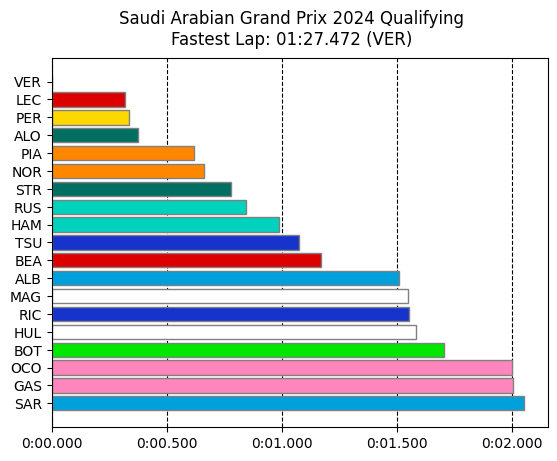

In [65]:
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'], color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

#show fastest at top
ax.invert_yaxis()

#draw vertical lines behind bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{session.event['EventName']} {session.event.year} Qualifying\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

plt.show()